<a href="https://colab.research.google.com/github/ussalbt/deep-learning-with-python/blob/main/DL_S2_(Installing_Tensorflow_%26_Keras_Syntext_Basics_fake_reg)ders1full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [1]:
!python --version

Python 3.7.13


In [ ]:
#!pip install tensorflow

In [2]:
import tensorflow as tf
tf.__version__

'2.8.2'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("/content/sample_data/fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


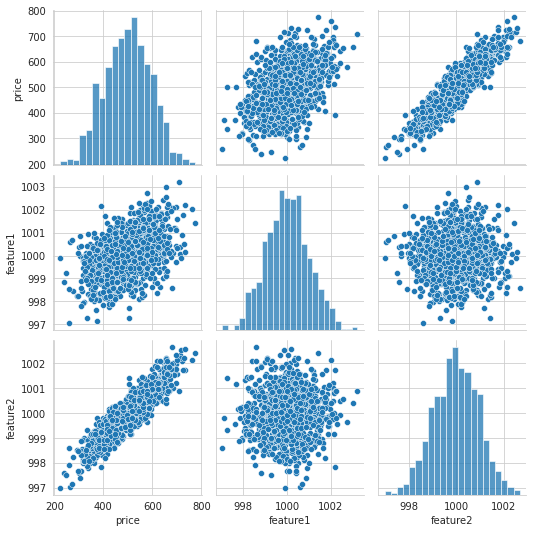

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# X = df[['feature1', 'feature2']].values
# y = df['price'].values

In [12]:
X = df[['feature1', 'feature2']]
y = df['price']

In [13]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [14]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [16]:
X_train.shape

(700, 2)

In [17]:
X_test.shape

(300, 2)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [20]:
scaler = MinMaxScaler()#standart yada robust scaler kulanılabilir.min max ve std lazım.

In [21]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential# functional apı öğrenilecek.
from tensorflow.keras.layers import Input,Dense, Activation

In [24]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

In [25]:
help(Dense)

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [26]:
X_train.shape

(700, 2)

In [39]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [28]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))#units silinebilir.
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.65038633,  0.41919303,  0.23148108, -0.33897352],
        [-0.26465154, -0.282202  ,  0.36369157, -0.6623492 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.23801255,  0.43317896, -0.14397281, -0.03743297],
        [-0.46268564, -0.25662434, -0.49509606,  0.19338864],
        [-0.43640488,  0.44718975,  0.60177654, -0.15373874],
        [-0.2531619 , -0.27012295,  0.69388527, -0.07993472]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.0437144 ,  0.34610862,  0.45113927,  0.26631778],
        [ 0.10322094,  0.78903335,  0.36657304, -0.08199763],
        [ 0.7582217 , -0.21824819, -0.150

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')#regression da loss function mse kullanılıyor.

In [47]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [48]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256581.0000
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256408.0156
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256234.1250
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256047.9375
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 255848.4375
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255636.6875
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255411.1719
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255169.6719
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 254907.0156
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 254617.9844
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254299.3125
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.weights

[<tf.Variable 'dense_8/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.65038633,  0.2618095 ,  2.0751948 , -0.33897352],
        [-0.26465154, -0.41463545,  4.226432  , -0.6623492 ]],
       dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        , -0.15917747,  0.7710244 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_9/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.23801255,  0.43317896, -0.14397281, -0.03743297],
        [-0.46268564, -0.12206832, -0.54078287,  0.18274836],
        [-0.43640488,  2.974488  ,  2.812172  , -0.16361336],
        [-0.2531619 , -0.27012295,  0.69388527, -0.07993472]],
       dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.        ,  0.74253   ,  0.43983704, -0.00955525], dtype=float32)>,
 <tf.Variable 'dense_10/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.0437144 ,  0.34610862,  0.45113927,  0.26631778],
        [ 1.661089  ,  3.115450

In [51]:
model.history.history

{'loss': [256581.0,
  256408.015625,
  256234.125,
  256047.9375,
  255848.4375,
  255636.6875,
  255411.171875,
  255169.671875,
  254907.015625,
  254617.984375,
  254299.3125,
  253951.5,
  253570.625,
  253158.359375,
  252711.59375,
  252227.390625,
  251701.09375,
  251139.890625,
  250536.546875,
  249888.609375,
  249193.28125,
  248449.640625,
  247650.921875,
  246792.875,
  245869.96875,
  244885.484375,
  243834.859375,
  242717.421875,
  241524.109375,
  240260.484375,
  238919.75,
  237496.6875,
  235996.796875,
  234407.015625,
  232734.421875,
  230969.421875,
  229119.296875,
  227164.59375,
  225116.953125,
  222954.484375,
  220718.0625,
  218359.90625,
  215901.34375,
  213344.234375,
  210670.171875,
  207874.125,
  204982.265625,
  201996.984375,
  198877.21875,
  195637.8125,
  192284.390625,
  188811.9375,
  185228.578125,
  181512.1875,
  177693.984375,
  173776.328125,
  169728.15625,
  165592.15625,
  161324.28125,
  156953.484375,
  152496.28125,
  147933.5,

In [52]:
pd.DataFrame(model.history.history)# her bir batch için hesaplanıyor

,loss
0,256581.000
1,256408.016
2,256234.125
3,256047.938
4,255848.438
...,...
245,24.235
246,23.925
247,24.165
248,24.271


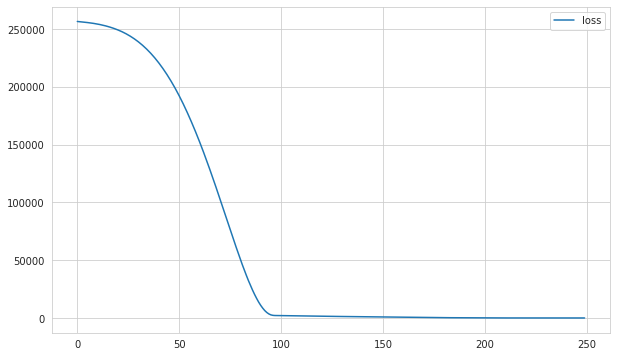

In [54]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

(0.0, 3000.0)

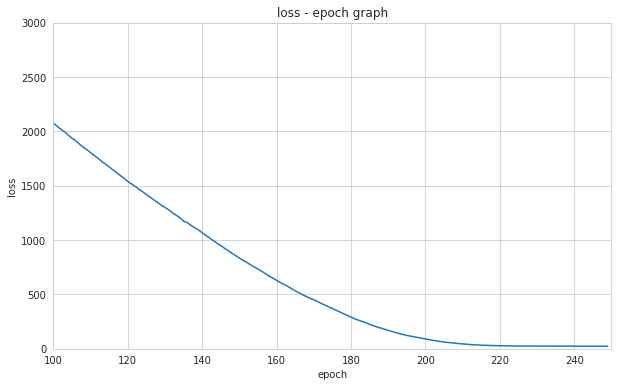

In [57]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([100, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [58]:
model.evaluate(X_train, y_train, verbose=0)#train için loss function (mse) için değer veriyor.Floatin precision değerleri olduğu için farklı

26.270435333251953

In [59]:
model.evaluate(X_test, y_test, verbose=0)

26.300960540771484

In [60]:
y_pred = model.predict(X_test)

In [62]:
mean_squared_error(y_test, y_pred)

26.300962899513305

In [61]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
893,560.678,548.501
737,624.156,621.941
321,451.898,451.707
59,397.882,394.569
249,599.924,601.915
231,526.674,517.316
486,549.848,548.241
78,408.122,409.084
994,481.863,478.463
198,418.457,416.751


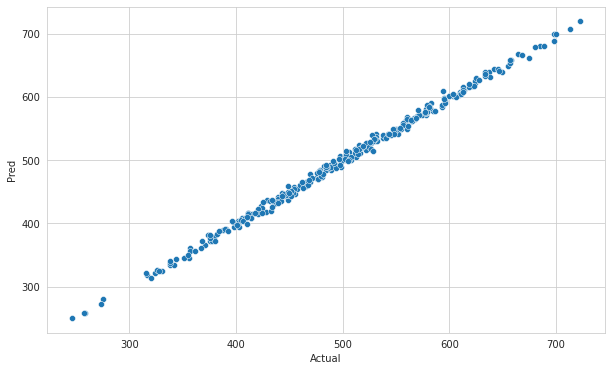

In [63]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [64]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [65]:
eval_metric(y_test, y_pred)

r2_score: 0.9970085454761293 
mae: 4.116455966505904 
mse: 26.300962899513305 
rmse: 5.128446441127498


## Final Model and Model Deployment

### Final Model Training

In [66]:
scaler = MinMaxScaler().fit(X)

In [67]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [68]:
X_scaled = scaler.transform(X)

In [69]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 257023.8438
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 256742.0156
Epoch 3/250
32/32 [==============================] - 0s 1ms/step - loss: 256424.7500
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256048.8438
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 255601.8750
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 255084.5469
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 254492.6094
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 253808.6875
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 253017.8594
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 252108.1406
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 251070.0156
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

The key difference between HDF5 and SavedModel is that HDF5 uses object configs to save the model architecture, while SavedModel saves the execution graph. Thus, SavedModels are able to save custom objects like subclassed models and custom layers without requiring the original code.

In [70]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
#final_model.save("model_fake_reg") 

### Loading Model

In [71]:
from tensorflow.keras.models import load_model

In [72]:
model_fake_reg = load_model('model_fake_reg.h5')

In [73]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [75]:
sample = [[998, 1000]]# tek örnek olsabile dataframe ile verilmesi lazım

In [76]:
sample_scaled = scaler_fake_reg.transform(sample)

In [77]:
model_fake_reg.predict(sample_scaled)

array([[420.53168]], dtype=float32)

## Prediction-2

In [78]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [79]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [80]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [81]:
model_fake_reg.predict(sample_scaled)

array([[380.35336],
       [331.8886 ],
       [283.42392],
       [234.95914],
       [186.49442]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___